<center> 
    <h1> Long Assignment 2021/2022 </h1>
    <h2> Introduction to Data Science </h2>
</center>
<br>

<h4 align=right> <b>Piotr Buczek</b> </h4>
<h4 align=right> <b>Agata Dratwa</b> </h4>
<h4 align=right> <b>Katarzyna Szleper</b> </h4>

<br>


## **1. Business understanding**
<br>
Background:

- Company works in luxury market.

Business objective: 

- Company wants to determine which attributes of website/product influence the customers' decision to buy particular products in order to increase its online sales.

Business succes criteria: 

- Signifcant increase in amount of sales in the e-commerce. 
- Spotted factors which mainly contribute to customers' purchasing decisions. 

Data: 

- Access to data of each customer separately during the session (type of device, movement in the website, duration, origin etc.)

Data Mining Goals:

- Predict if customer will buy the product given different attributes

Data Mining Success Criteria:

- Not explicit. We can assume that we want to achive a certain level of predective accuracy (e.g predictive model with accuracy over 94%).

## **2. Data Understanding**
<br>

In this point, raw data was presented in different ways. At the beginning we can take a look at the first rows of data in a table form.

In [40]:
import pandas as pd
import numpy as np 
    
dataset_train_full = pd.read_csv('train_full.csv')
dataset_train_balanced = pd.read_csv('train_balanced.csv')
dataset_train_full.head()

,Unnamed: 0,session_id,plaform,segment,customer_type,device_group,visitor_type,has_listing,has_used_search,has_recommendation,...,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,is_subscribed,browser_name,country,bought
0,0,aae4be18-e8f9-41c6-8906-6fa41cd83f8a,website,without_segment,prospect,Mobile Web,new,1,0,0,...,0,0,1,0,0,1,NaN,Safari,US,0
1,1,62175cec-8acd-420c-ba11-0082901d6333,website,without_segment,prospect,Mobile Web,returning,0,0,1,...,0,0,1,1,1,1,NaN,Chrome,MX,0
2,2,e45c3886-bfeb-45c5-8d3f-00011d89a767,mobile_app,FFACCESS-Bronze,customer,App,returning,1,0,1,...,0,27,10,1,1,1,No,NaN,RU,0
3,3,9fd5e56c-24e9-4974-9d69-e3509922d80d,mobile_app,without_segment,customer,App,returning,1,0,0,...,0,88,15,5,1,1,Yes,NaN,RU,0
4,4,ddebea0b-a83f-459f-b0c4-d17efe4df69f,website,without_segment,prospect,Mobile Web,new,0,0,0,...,0,0,1,1,1,1,NaN,Instagram App,US,0


In order to get some more information about the number of not NaN values and type of variable, we used the info() function. We can observe meaningful loss in data in columns is_subscribed and browser_name.

In [2]:
dataset_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  95000 non-null  int64 
 1   session_id                  95000 non-null  object
 2   plaform                     95000 non-null  object
 3   segment                     95000 non-null  object
 4   customer_type               95000 non-null  object
 5   device_group                95000 non-null  object
 6   visitor_type                95000 non-null  object
 7   has_listing                 95000 non-null  int64 
 8   has_used_search             95000 non-null  int64 
 9   has_recommendation          95000 non-null  int64 
 10  has_add_to_wishlist         95000 non-null  int64 
 11  has_add_to_bag              95000 non-null  int64 
 12  duration                    95000 non-null  int64 
 13  view_qty                    95000 non-null  in

<br>

#### Data dictionary with description of the variables according to their type:
<br>

• session_id -> Identifier of the session -> **nominal variable**

• plaform -> Identifies used platform (website/mobile app) -> **nominal binary variable**

• segment -> Variable not described (without_segment/FFACCESS-Bronze/FACCESS-Gold/FACCESS-Platinum/FACCESS-Silver/FACCESS-Private-Client) -> **categorical nominal variable**

• customer type -> Identifies if a user has purchased before (customer/prospect) -> **nominal binary variable**

• device group -> Device Group (app/mobile web/desktop) -> **categorical nominal variable**

• visitor type -> If the device is new in the company platform (new/returning) -> **nominal binary variable**

• has_listing -> Flag that indicates if the session has a listing view -> **binary variable**

• has_used_search -> Flag that indicates if the session has a search view -> **binary variable**

• has_recommendation -> Flag that indicates if the session has a recommendation view -> **binary variable**

• has_add_to_wishlist -> Flag that indicates if the session has an add_to_wishlist view -> **binary variable**

• has_add_to_bag -> Flag that indicates if the session has an add_to_bag view -> **binary variable**

• duration -> Session duration (in seconds) -> **continuous numeric**

• view_qty -> Number of views in the session -> **discrete numeric**

• unique_product_qty -> Number of distinct product page views within the session -> **discrete numeric**

• unique_browse_designer_qty -> Number of distinct designer_id within the session -> **discrete numeric**

• unique_browse_category_qty -> Number of distinct category_id within the session -> **discrete numeric**

• is_subscribed -> If the user is subscribed in the newsletter -> **nominal binary variable**

• browser_name -> User agent browser name -> **nominal variable**

• country -> Session client country -> **nominal variable**

• bought -> Flag that indicates if the session has an order -> **binary variable**

In [41]:
dataset_train_processed = dataset_train_full.copy()

#Removal of is_subscribed and browser_name
dataset_train_processed = dataset_train_processed.drop(columns=['is_subscribed', 'browser_name'])
                             
dataset_train_balanced.head()

,Unnamed: 0,session_id,plaform,segment,customer_type,device_group,visitor_type,has_listing,has_used_search,has_recommendation,...,has_add_to_bag,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty,is_subscribed,browser_name,country,bought
0,90000,a392f31b-fbe2-474a-be21-b0993ce39050,website,without_segment,prospect,Mobile Web,new,1,1,1,...,1,2766,58,21,8,5,NaN,Apple Mail,US,1
1,90001,40ff2080-12c9-41c8-b730-de882cc863cf,website,FFACCESS-Silver,customer,Mobile Web,returning,1,1,1,...,1,928,19,4,6,2,Yes,Samsung Browser,KR,1
2,90002,d7a372e9-6d4f-4063-9537-51d5e8913f6a,mobile_app,FFACCESS-Private-Client,customer,App,returning,1,1,0,...,1,848,70,6,2,1,Yes,NaN,CN,1
3,90003,88fc6385-98b8-4e46-95f4-22a5ffa428f7,mobile_app,without_segment,customer,App,returning,0,0,0,...,1,243,25,1,1,1,No,NaN,HK,1
4,90004,68998626-90d5-421a-a6e6-0ec8b3f2fd45,mobile_app,without_segment,customer,App,returning,1,0,0,...,1,1806,135,25,14,4,No,NaN,RU,1


<br>

#### Preliminary analysis
According to the data types we can distinguish 4 main groups of attributes:

- binary variables (platform, customer_type, visitor_type, has_listing, has_used_search, has_recommendation, has_add_to_wishlist, has_add_to_bag, bought)
- numerical variables (duration, view_qty, unique_product_qty, unique_browse_designer_qty, unique_browse_category_qty)
- categorical variables (segment, device_group)
- nominal variables (session_id, country) 

Data analysis might be performed only on the numerical, binary and categorical variables.

In [42]:
attributes = ['plaform', 'segment', 'customer_type', 'device_group', 'visitor_type', 'has_listing', 'has_used_search', 'has_recommendation', 'has_add_to_wishlist', 'has_add_to_bag', 'duration', 'view_qty', 'unique_product_qty', 'unique_browse_designer_qty', 'unique_browse_category_qty', 'browser_name', 'country', 'bought']
endogenous= ['plaform', 'customer_type', 'visitor_type', 'has_listing', 'has_used_search', 'has_recommendation', 'has_add_to_wishlist', 'has_add_to_bag', 'duration', 'view_qty', 'unique_product_qty', 'unique_browse_designer_qty', 'unique_browse_category_qty']
binary = ['plaform', 'customer_type', 'visitor_type', 'has_listing', 'has_used_search', 'has_recommendation', 'has_add_to_wishlist', 'has_add_to_bag', 'bought']
numerical = ['duration','view_qty','unique_product_qty', 'unique_browse_designer_qty', 'unique_browse_category_qty']
categorical = ['segment', 'device_group']
binnumcat = ['plaform', 'customer_type', 'visitor_type', 'has_listing', 'has_used_search', 'has_recommendation', 'has_add_to_wishlist', 'has_add_to_bag', 'bought','duration','view_qty','unique_product_qty', 'unique_browse_designer_qty', 'unique_browse_category_qty','segment', 'device_group']

Summaries and spread measures for numerical variables

In [43]:
dataset_train_processed[numerical].describe()

,duration,view_qty,unique_product_qty,unique_browse_designer_qty,unique_browse_category_qty
count,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000
mean,332.473663,10.972179,2.766547,1.676105,1.166042
std,868.827560,31.213357,8.493634,3.374039,1.353135
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000
50%,15.000000,2.000000,1.000000,1.000000,1.000000
75%,223.000000,8.000000,2.000000,1.000000,1.000000
max,20295.000000,1151.000000,416.000000,158.000000,84.000000


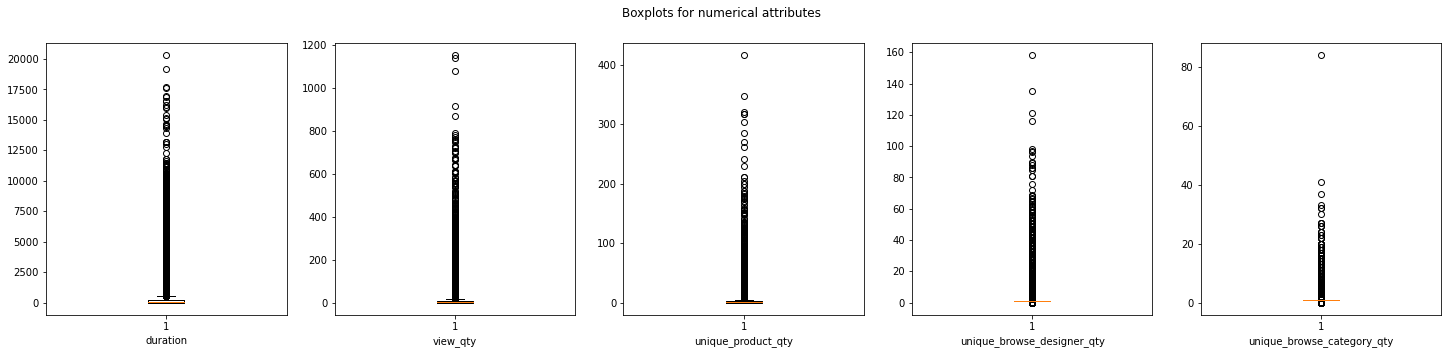

In [44]:
import matplotlib.pyplot as plt

#Boxplots
fig, sc = plt.subplots(1,len(numerical), figsize=(25,5))
fig.suptitle('Boxplots for numerical attributes')
for i in range(len(numerical)):
    sc[i].boxplot(dataset_train_processed[numerical[i]])
    sc[i].set(xlabel=numerical[i])

As we can see on the boxplots of each numerical attribute there exist many outliers

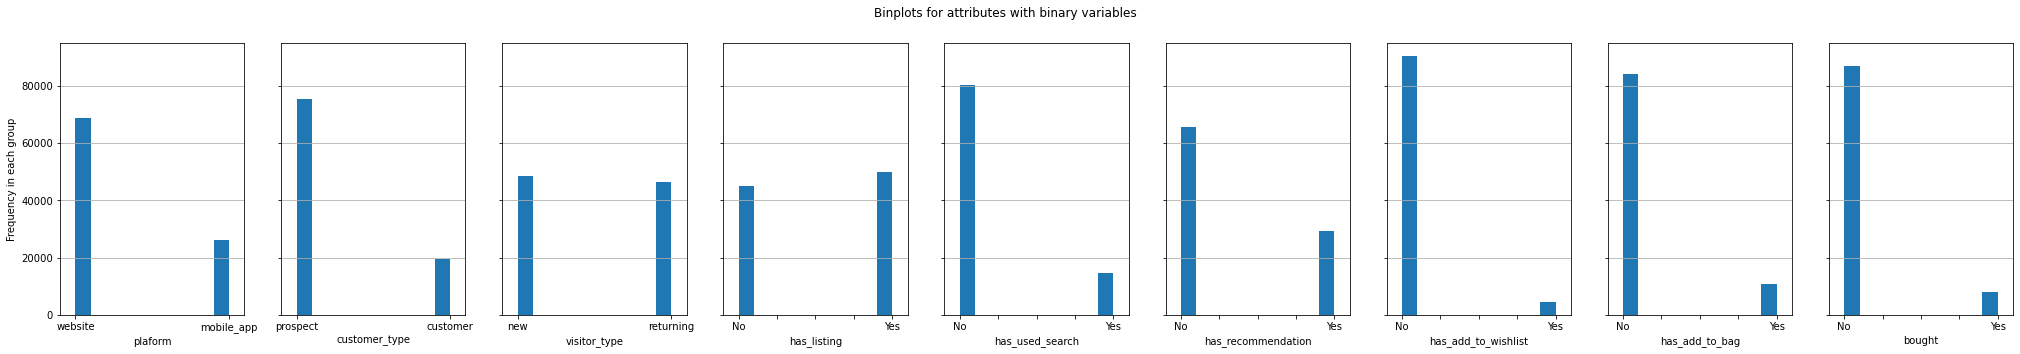

In [45]:
def bintransformation(v, t):
    if v == 0:
        return 'No'
    if v == 1:
        return 'Yes'
#Binplots for binary
fig, sc = plt.subplots(1,len(binary), figsize=(35,5))
fig.suptitle('Binplots for attributes with binary variables')
for i in range(len(binary)):
    sc[i].hist(dataset_train_processed[binary[i]], align='mid')
    sc[i].set(xlabel=binary[i])
    sc[i].set_ylim(0,95000)
    sc[i].set_xlim(-0.1, 1.1)
    sc[i].grid(axis='y')
    if i > 0:
        sc[i].yaxis.set_major_formatter(plt.NullFormatter())
    if i > 2:
        sc[i].xaxis.set_major_formatter(plt.FuncFormatter(bintransformation))

        
sc[0].set(ylabel='Frequency in each group');

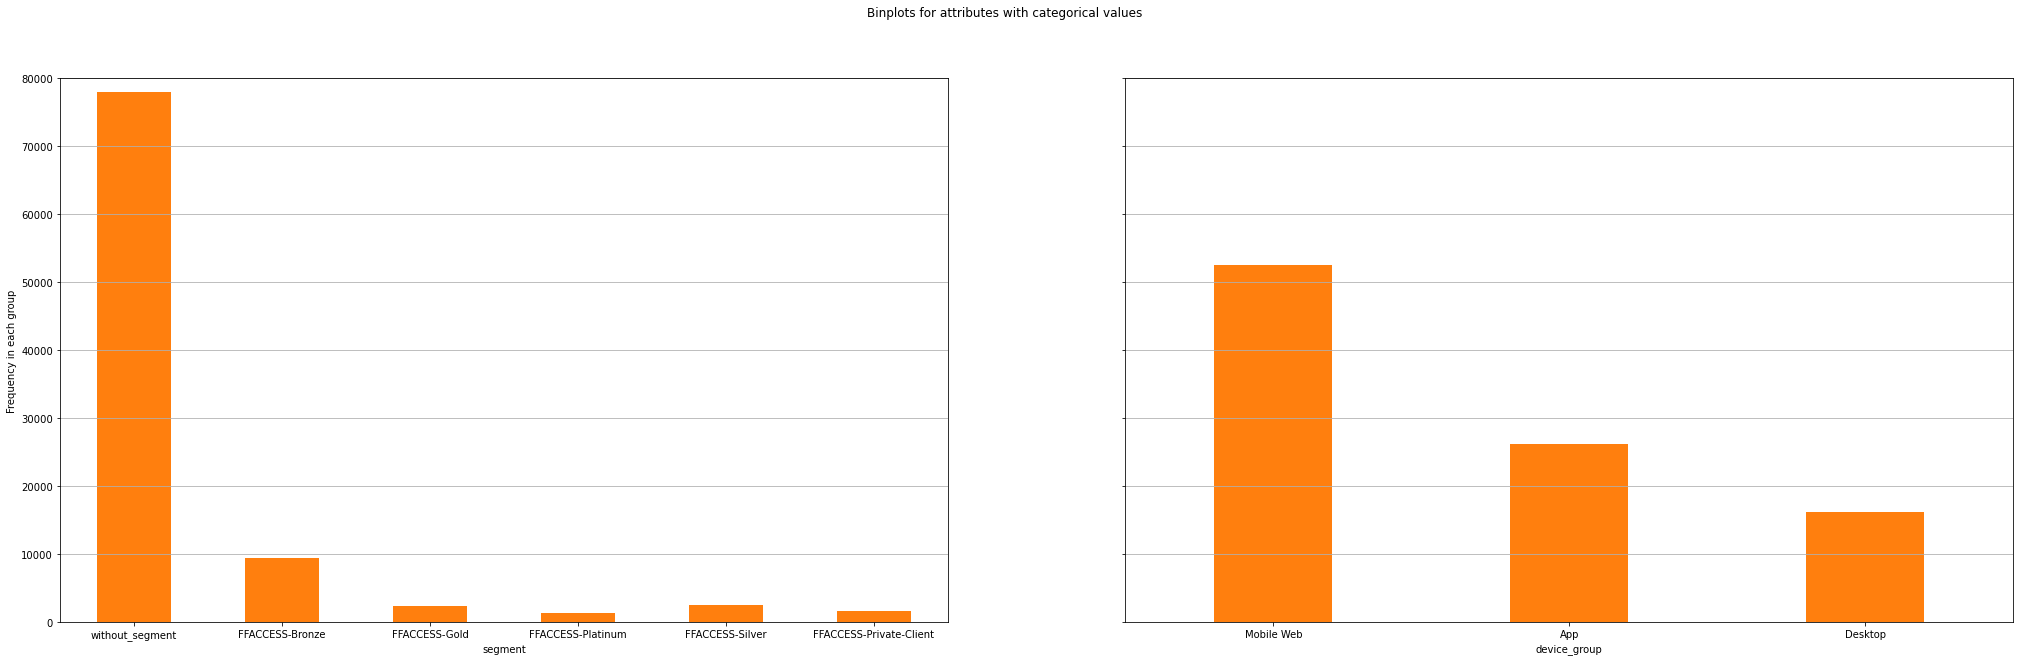

In [8]:
#Binplots for categorical
fig, sc = plt.subplots(1,len(categorical), figsize=(35,10))
fig.suptitle('Binplots for attributes with categorical values')
for i in range(len(categorical)):
    sc[0].hist(dataset_train_processed[categorical[0]], align='left', bins = range(7), rwidth=0.5)
    sc[0].set_xlim(-0.5, 5.5)
    sc[1].hist(dataset_train_processed[categorical[1]], align='left', bins = range(4), rwidth=0.4)
    sc[1].set_xlim(-0.5, 2.5)
    sc[i].set(xlabel=categorical[i])
    sc[i].set_ylim(0, 80000)
    sc[i].grid(axis='y')
    sc[1].yaxis.set_major_formatter(plt.NullFormatter())
sc[0].set(ylabel='Frequency in each group');

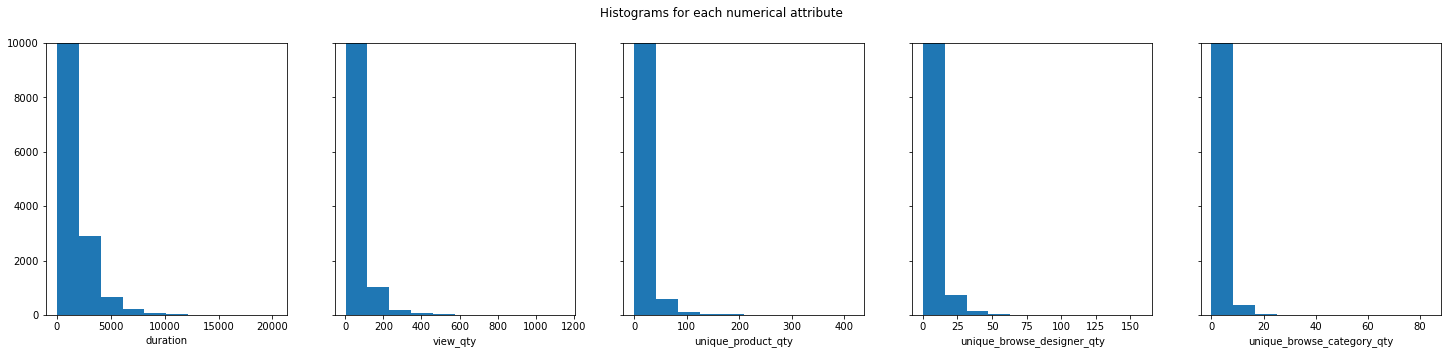

In [46]:
fig, sc = plt.subplots(1,len(numerical), figsize=(25,5))
fig.suptitle('Histograms for each numerical attribute')
for i in range(len(numerical)):
    sc[i].hist(dataset_train_processed[numerical[i]])
    sc[i].set(xlabel=numerical[i])
    sc[i].set_ylim(0, 10000)
    if i > 0:
        sc[i].yaxis.set_major_formatter(plt.NullFormatter())

In order to present better the distribution of numerical attributes we plot them in log scale.

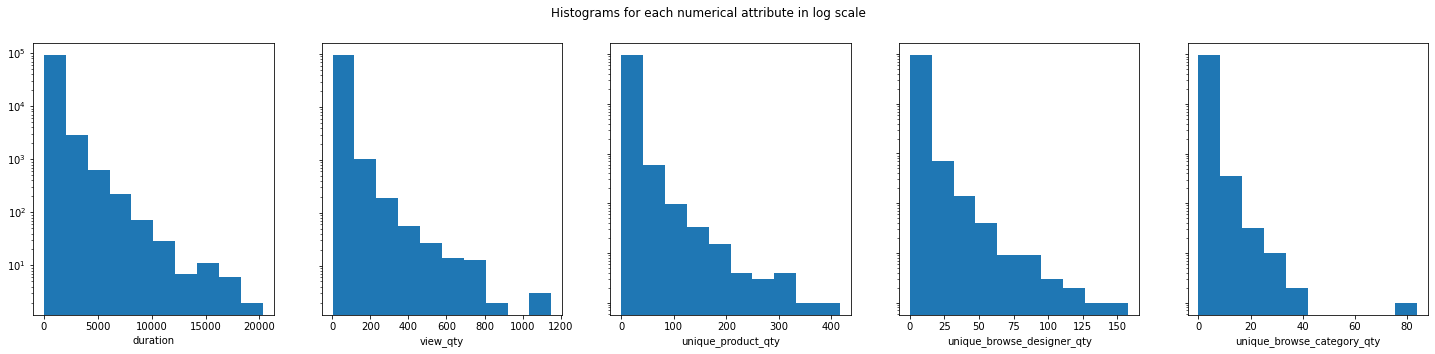

In [47]:
fig, sc = plt.subplots(1,len(numerical), figsize=(25,5))
fig.suptitle('Histograms for each numerical attribute in log scale')
for i in range(len(numerical)):
    sc[i].hist(dataset_train_processed[numerical[i]], log=True)
    sc[i].set(xlabel=numerical[i])
    if i > 0:
        sc[i].yaxis.set_major_formatter(plt.NullFormatter())

<br>

#### Bivariate analysis

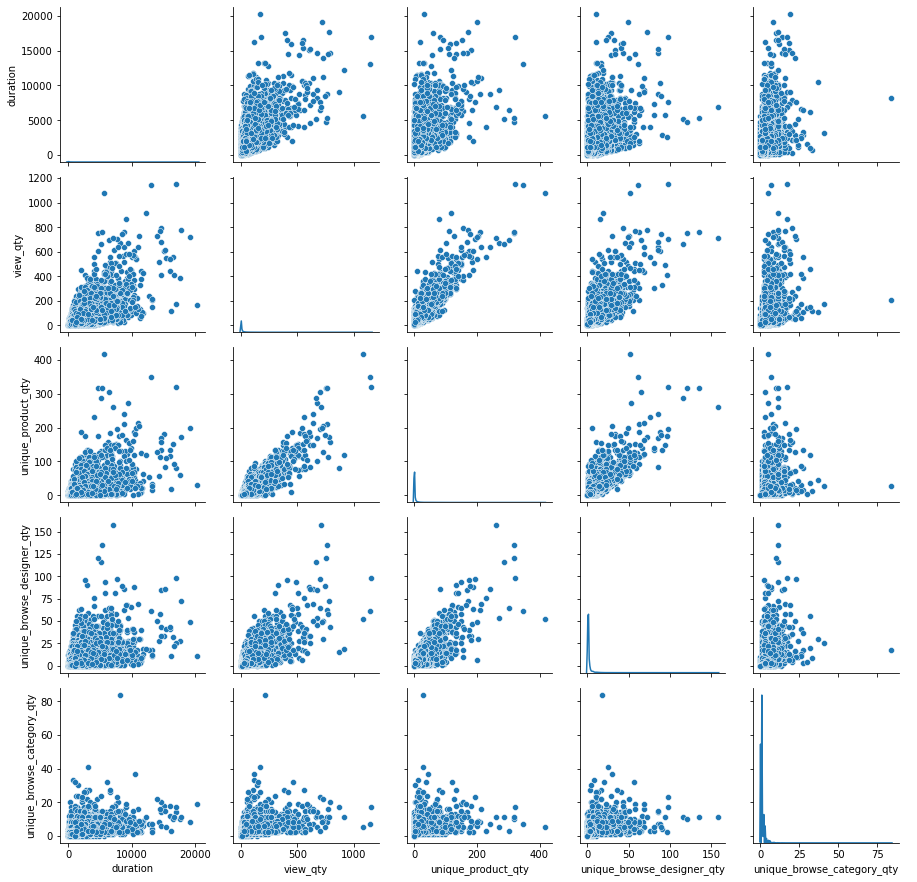

In [48]:
import seaborn as sns
#only for numerical variables
d = sns.PairGrid(dataset_train_processed[numerical]) 
d.map_diag(sns.kdeplot)
d.map_offdiag(sns.scatterplot)
d.add_legend();

In order to process nominal binary variables, nominal values were transformed into binary (0,1) values.

In [51]:
#Nominal binary variables transformation
dataset_train_processed['plaform'] = dataset_train_processed['plaform'].replace(['website', 'mobile_app'], [0, 1])
dataset_train_processed['customer_type'] = dataset_train_processed['customer_type'].replace(['prospect', 'customer'], [0, 1])
dataset_train_processed['visitor_type'] = dataset_train_processed['visitor_type'].replace(['new', 'returning'], [0, 1])

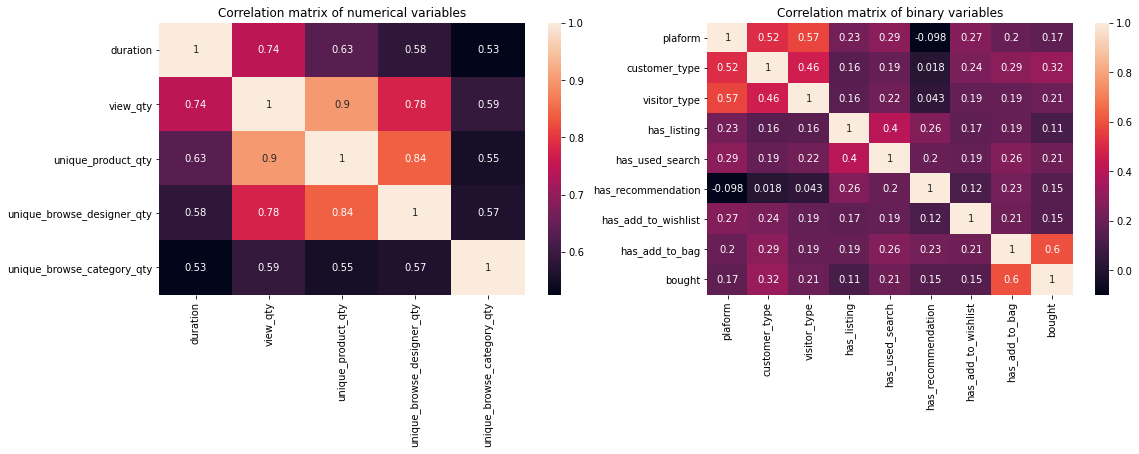

In [52]:
#Heatmap for numerical
corr = dataset_train_processed[numerical].corr()
fig, ax = plt.subplots(1,2, figsize=(18,5)) 
sns.heatmap(corr, annot=True, ax=ax[0])
ax[0].set_title('Correlation matrix of numerical variables')

#Heatmap for binary
corr = dataset_train_processed[binary].corr()
sns.heatmap(corr, annot=True, ax=ax[1])
ax[1].set_title('Correlation matrix of binary variables');

All numerical variables are highly correlated with each other which can cause future problems with redundancies during modeling. Due to that we should be cautious with selecting them all together in one model.
As we can see in the second heatmap, majority of binary variables aren't correlated significantly with each other (except customer_type with platform ans visitor_type with platfrom) which is good for including them all together in modelling.
Also our exogenous variable isn't highly correlated with binary variables (except of has_add_to_bag variable) what means they are
not the best potentially data for modelling. However, we will take ones with highest correlation among them to try if they can be useful for modelling.

<br>

#### Biserial correlation for correlation between numerical and binary variables
Due to binary type and numerical type of data we had to change the pearson correlation to biserial correlation.

In [53]:
from scipy.stats import pointbiserialr
y = dataset_train_processed.bought
regression_scores = pd.DataFrame()
corr = []
correlation_scores = pd.DataFrame()
for i in range(len(numerical)):
    X = dataset_train_processed[numerical[i]]
    pbc = pointbiserialr(y, X)
    corr.append(pbc[0])
correlation_scores['Variable']=numerical
correlation_scores['Biserial correlation']=corr
correlation_scores

,Variable,Biserial correlation
0,duration,0.443926
1,view_qty,0.362025
2,unique_product_qty,0.201568
3,unique_browse_designer_qty,0.179785
4,unique_browse_category_qty,0.203616


From all of numerical variables duration and number of views in the session have the strongest correlation with bought variable but still the correlation is rather weak.  In all of other cases the correlation is so low that we can assume that there is no correlation between variables. Probably the first two variables will be the best data for futer modelling.

<br>

#### Logistic regression

In [54]:
#Logistic regression - each attribute with bought

from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression(solver='liblinear', random_state=0)
y = dataset_train_processed.bought
scores = []
coeffs = []

for i in range(len(endogenous)):
    X = np.array(dataset_train_processed[endogenous[i]]).reshape((-1,1))
    model.fit(X, y)
    scores.append(model.score(X,y))
    coeffs.append(model.coef_[0][0])
    
regression_scores = pd.DataFrame({'Variable': endogenous, 'R2':scores, 'Coefficient':coeffs})
regression_scores

,Variable,R2,Coefficient
0,plaform,0.915789,1.218800
1,customer_type,0.915789,2.152338
2,visitor_type,0.915789,1.730145
3,has_listing,0.915789,0.884979
4,has_used_search,0.915789,1.497733
5,has_recommendation,0.915789,1.054551
6,has_add_to_wishlist,0.915789,1.519731
7,has_add_to_bag,0.927147,3.882701
8,duration,0.920326,0.001161
9,view_qty,0.916768,0.029956


We can observe that all of the R2 has high significant level of describing 'bought' variable. To compare the size of relationship between the variables we can use the coefficient values. All of the variables have positive values of the coefficient, which means positive influence on the bought. The highest influence on the "bought" based on coefficient has:
- if the person added an item to the bag (has_add_to_bag) 
- if a user has purchased before (customer_type)
- if the device is new in the company platform (new/returning)(visitor_type)
- flag that indicates if the session has an add_to_wishlist view(has_add_to_wishlist)
- if the session has a search view (has_used_search)


<br>

#### Conclusions and insights about the data
- High standard deviation among numerical variables, big difference between mean and median values. This is caused by high rate of outliers in the database. All outliers existing in the dataset might not be errors. This values could be caused by normal using of the page by users, ex. user can left the page open which makes the duration time high.
- Attribute is_subscribed has a lot of NaN values (over 70%) and browser_name also has few non-null values (around 30%).
- None of the numerical variables has normal distribution. All of them has right-skewed distribution.
- From bivariate analysis we can conclude that there is high correlation between the numerical endogenous variables which can cause redundancies(unwanted phenomenon). Despite not signicant correlations between endogenous and exogenous variables we can select some potentials features in order to include them in future modelling. In order to choose variables with the highest impact on our bought variable we conducted also logistic regression. The variables with the biggest impact on "bought" variable have the highest value of coefficient in logistic regression, which are all binary variables. To sum up our bivariate analysis, the biggest impact on our dependent variables have: has_add_to_bag, customer_type, visitor_type, has_add_to_wishlist, has_used_search. This features will be further analysed.

## **3. Data Preparation**
The balanced and non-balanced dataset are prepared according to further conclusions:
- We removed columns is_subscribed and browser_name because of meaningful loss in data
- Only the most important features are taken into account for modelling according to the correlation analysis, which are: **has_add_to_bag, customer_type, visitor_type, has_add_to_wishlist, has_used_search, duration, view_qty** and categorical variables, because we coudn't exclude them based on correlation analysis: **device_group, segment**
- Nominal binary variables are transformed into binary variables
- Categorical variables are transformed into dummy variables

In [55]:
#Balanced data
balanced = dataset_train_balanced
balanced = balanced.loc[:,['has_add_to_bag', 'customer_type', 'visitor_type', 'has_add_to_wishlist', 'has_used_search', 'duration', 'view_qty', 'device_group', 'segment','bought']]
balanced.loc[:,'customer_type'] = balanced['customer_type'].replace(['prospect', 'customer'], [0, 1])
balanced.loc[:,'visitor_type'] = balanced['visitor_type'].replace(['new', 'returning'], [0, 1])

balanced = pd.get_dummies(balanced,columns=['device_group', 'segment'])

X_balanced = balanced.drop('bought', axis=1)
y_balanced = balanced.loc[:,'bought']



#Non-balanced data
non_balanced = dataset_train_full
non_balanced = non_balanced.loc[:,['has_add_to_bag', 'customer_type', 'visitor_type', 'has_add_to_wishlist', 'has_used_search', 'duration', 'view_qty', 'device_group', 'segment', 'bought']]
non_balanced.loc[:,'customer_type'] = non_balanced['customer_type'].replace(['prospect', 'customer'], [0, 1])
non_balanced.loc[:,'visitor_type'] = non_balanced['visitor_type'].replace(['new', 'returning'], [0, 1])

non_balanced = pd.get_dummies(non_balanced,columns=['device_group', 'segment'])

X_non_balanced = non_balanced.drop('bought', axis=1)
y_non_balanced = non_balanced.loc[:,'bought']


X_non_balanced.head()

,has_add_to_bag,customer_type,visitor_type,has_add_to_wishlist,has_used_search,duration,view_qty,device_group_App,device_group_Desktop,device_group_Mobile Web,segment_FFACCESS-Bronze,segment_FFACCESS-Gold,segment_FFACCESS-Platinum,segment_FFACCESS-Private-Client,segment_FFACCESS-Silver,segment_without_segment
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0,1,1,0,0,27,10,1,0,0,1,0,0,0,0,0
3,0,1,1,1,0,88,15,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


## **4. Modeling**

### **4.1. Balanced data** - sample of 16000 observations with the same variables as the non-balanced (raw) data

In order to prepare train and test set, we are using train_test_split function.

In [18]:
#Creating dataframe to compare the results
models_balanced = ['kNN', 'Bayesian Classifier', 'Decision Trees', 'Tree Ensembles', 'Support Vector Machines', 'Neural Networks']
scores_balanced = pd.DataFrame(index = models_balanced, columns = ['Accuracy Rate', 'Standard deviation'])

from sklearn.model_selection import train_test_split

#Split the data into test and train sets
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, train_size=0.9, 
                                  random_state=123)

### **4.1.1. Nearest neighbour**

Scaling numerical variables is required to use the kNN method, because it uses the Euclidean distance between two data points to find nearest neighbors.

In [21]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_balanced[['duration','view_qty']])
scaled_features = scaler.transform(X_balanced[['duration','view_qty']])

X_balanced_scaled = X_balanced
X_balanced_scaled.loc[:,['duration','view_qty']] = scaled_features

X_balanced_scaled.head()

,has_add_to_bag,customer_type,visitor_type,has_add_to_wishlist,has_used_search,duration,view_qty,device_group_App,device_group_Desktop,device_group_Mobile Web,segment_FFACCESS-Bronze,segment_FFACCESS-Gold,segment_FFACCESS-Platinum,segment_FFACCESS-Private-Client,segment_FFACCESS-Silver,segment_without_segment
0,1,0,0,0,1,1.230939,0.540053,0,0,1,0,0,0,0,0,1
1,1,1,1,0,1,0.009787,-0.163858,0,0,1,0,0,0,0,1,0
2,1,1,1,0,1,-0.043365,0.756641,1,0,0,0,0,0,1,0,0
3,1,1,1,0,0,-0.445322,-0.055564,1,0,0,0,0,0,0,0,1
4,1,1,1,0,0,0.593123,1.929826,1,0,0,0,0,0,0,0,1


In [22]:
from sklearn.model_selection import train_test_split

#Split the data into test and train sets
X_balanced_scaled_train, X_balanced_scaled_test, y_balanced_scaled_train, y_balanced_scaled_test = train_test_split(X_balanced_scaled, y_balanced, train_size=0.9, 
                                  random_state=123)

<br/>To find the number of neighbours which provides the best accuracy, we are fitting our model with different K-value from 1 to 30.<br/>
The result is shown on a plot of the accuracy rate vs K-value. 

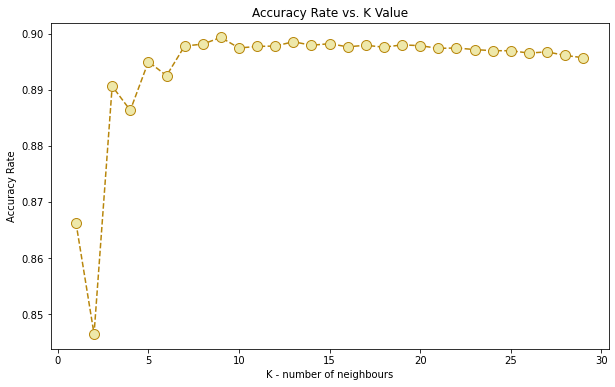

In [23]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracy_rate = []
for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_balanced_scaled_train,y_balanced_scaled_train)
    accuracy_rate.append(cross_val_score(model, X_balanced_scaled_train, y_balanced_scaled_train, cv=10).mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy_rate,color='darkgoldenrod', linestyle='dashed', marker='o',
         markerfacecolor='palegoldenrod', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K - number of neighbours')
plt.ylabel('Accuracy Rate');

On the plot above we can see that one of the best accuracy rate is for **k = 9**. <br/>
Now we will retrain our model using k = 9.

In [24]:
%%time
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_balanced_scaled_train, y_balanced_scaled_train)

#Cross-validation
score = cross_val_score(model, X_balanced_scaled_train, y_balanced_scaled_train, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))
scores_balanced['Accuracy Rate']['kNN'] = score.mean()
scores_balanced['Standard deviation']['kNN'] = score.std()

0.899 accuracy with a standard deviation of 0.008
CPU times: user 14.5 s, sys: 4.39 s, total: 18.9 s
Wall time: 3.29 s


Our accuracy score with **k-value = 9 is 89.9% (0.008)**

This value is about 5% better than when k-value = 2 (the lowest accuracy score). 
Almost 90% of values were predicted correctly which is high result. 

We will use model with k = 9 to compare KNN with different kinds of models.

#### **4.1.2. Bayesian Classifier**

As we know from the preliminary analysis, our X has both categorical and numerical variables so we have to conduct **mixed naive bayes model**. <br/>

In [25]:
%%time
from mixed_naive_bayes import MixedNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Select and encode categorical features
X_balanced_encoded = X_balanced

categorical_features = [0,1,2,3,4,7,8,9,10,11,12,13,14,15]

enc = OrdinalEncoder()
enc.fit(X_balanced_encoded.iloc[:,categorical_features])
X_balanced_encoded.iloc[:, categorical_features]=enc.transform(X_balanced_encoded.iloc[:,categorical_features])

# Encode the target variable
y_balanced_encoded = y_balanced 
lenc=LabelEncoder()
lenc.fit(y_balanced_encoded)
y_balanced_encoded=lenc.transform(y_balanced_encoded)

X_balanced_encoded_train, X_balanced_encoded_test, y_balanced_encoded_train, y_balanced_encoded_test = train_test_split(X_balanced_encoded, y_balanced_encoded, train_size=0.9, 
                                  random_state=123)

model = MixedNB(categorical_features=categorical_features)
model.fit(X_balanced_encoded_train, y_balanced_encoded_train)

# evaluate the model on train and test
score = cross_val_score(model,X_balanced_encoded_train,y_balanced_encoded_train)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores_balanced['Accuracy Rate']['Bayesian Classifier'] = score.mean()
scores_balanced['Standard deviation']['Bayesian Classifier'] = score.std()

0.801 accuracy with a standard deviation of 0.009
CPU times: user 121 ms, sys: 4.09 ms, total: 125 ms
Wall time: 126 ms


Mixed Naive Bayes Classifier obtained **80.1% (0.009)** accuracy which is lower than in case of KNN, but is faster. That means that with this dataset KNN approach is more accurate but less time efficient than NB model.

#### **4.1.3. Decision Trees**

In order to find the best depth parameter we are fitting our model with different depth parameter from 1 to 40.<br/> The result is shown on a plot of the accuracy rate vs. depth below.

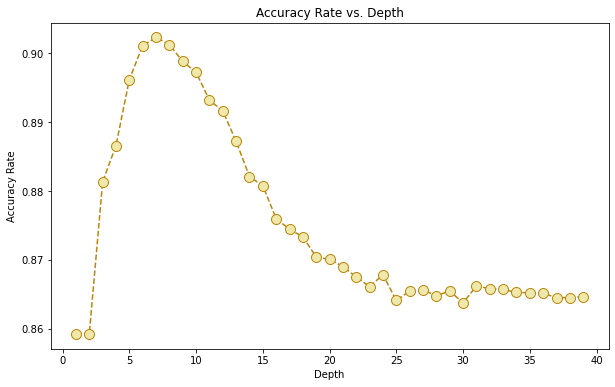

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def depth2acc(X1,y1,max_depth=None):
    dtree=DecisionTreeClassifier(max_depth=max_depth)
    scores=cross_val_score(dtree, X1, y1, cv=10)
    return scores.mean()

depths=range(1,40,1)
accs=list(map(lambda i:depth2acc(X_balanced_train,y_balanced_train,i),depths))

from matplotlib.pyplot import plot
plt.figure(figsize=(10,6))
plt.plot(depths,accs,color='darkgoldenrod', linestyle='dashed', marker='o',
         markerfacecolor='palegoldenrod', markersize=10)
plt.title('Accuracy Rate vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy Rate');

It can be seen that the best accuracy is for the tree with depth = 7. <br/>
Instead of using the default value, we will retrain our model using depth = 7 to prevent from overfitting and prune the tree.

In [27]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_balanced_train,y_balanced_train)
score = cross_val_score(model, X_balanced_train, y_balanced_train, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores_balanced['Accuracy Rate']['Decision Trees'] = score.mean()
scores_balanced['Standard deviation']['Decision Trees'] = score.std()

0.902 accuracy with a standard deviation of 0.008
CPU times: user 199 ms, sys: 1.98 ms, total: 201 ms
Wall time: 200 ms


The accuracy is **90.2% (0.008) for depth = 7**, which is about 4% higher than for depth = 2 (the lowest score). <br/>
We will use model with depth = 7 to compare Decision Trees model with different kinds of models. <br/>
We could plot our model but it won't be readable with such high depth.

#### **4.1.4. Tree ensembles**

Let's compare the decision tree model to a random forest.

In order to find the best number of trees in an random forest, we are fitting our model with number of estimators equal to: 1, 5, 10, 50, 100, 500, 1000.<br/>
The result is shown on a plot of the accuracy rate vs. number of trees below.

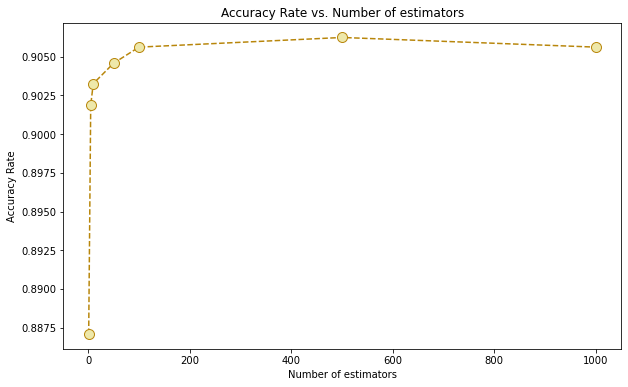

In [28]:
from sklearn.ensemble import RandomForestClassifier
n = (1, 5, 10, 50, 100, 500, 1000)
accuracy_rate = []
for i in n:
    rfc = RandomForestClassifier(n_estimators=i, max_depth = 7)
    rfc.fit(X_balanced_train,y_balanced_train)
    accuracy_rate.append(cross_val_score(rfc, X_balanced_train, y_balanced_train, cv=10).mean())

plt.figure(figsize=(10,6))
plt.plot(n,accuracy_rate,color='darkgoldenrod', linestyle='dashed', marker='o',
         markerfacecolor='palegoldenrod', markersize=10)
plt.title('Accuracy Rate vs. Number of estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy Rate');

Usually the higher the number of estimators the better accuracy of the model (by the cost of slower learning). It can be seen that the highest accuracy is reached for the Random forest with 100 estimators and there is no significant increase for higher number of trees. We are building a new model with number of estimators = 100 to reduce the cost of learning.

In [29]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth = 7)
model.fit(X_balanced_train,y_balanced_train)
score = cross_val_score(model, X_balanced_train, y_balanced_train, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores_balanced['Accuracy Rate']['Tree Ensembles'] = score.mean()
scores_balanced['Standard deviation']['Tree Ensembles'] = score.std()

0.906 accuracy with a standard deviation of 0.008
CPU times: user 4.29 s, sys: 25.4 ms, total: 4.32 s
Wall time: 4.32 s


The accuracy obtained for random forest model with **number of trees = 100 is equal to 90.5% (0.009)**, which is similar score in comparison to single decision tree, but may perform better on bigger sample set.

#### **4.1.5. Support Vector Machines**

In this model we are using the same data as in Decision Tree model - numerical variables and categorical variables transformed into dummy variables.

In [30]:
%%time
from sklearn.svm import SVC

#X_sample, X_rest, y_sample, y_rest = train_test_split(X_balanced_train2, y_balanced_train2, train_size=0.1, 
                                  #random_state=123) 
model = SVC(kernel='linear', C=1)
#model.fit(X_sample.iloc[:100],y_sample[:100])
model.fit(X_balanced_train.iloc[:100],y_balanced_train[:100])

#score=cross_val_score(model, X_sample.iloc[:100], y_sample[:100], cv=10)
score = cross_val_score(model, X_balanced_train[:100], y_balanced_train[:100], cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores_balanced['Accuracy Rate']['Support Vector Machines'] = score.mean()
scores_balanced['Standard deviation']['Support Vector Machines'] = score.std()

0.840 accuracy with a standard deviation of 0.092
CPU times: user 9.42 s, sys: 44.9 ms, total: 9.46 s
Wall time: 9.47 s


We tried to use this model on a 100 sample and the performance was good (**84%**) but such small sample is not representative for the whole dataset.
Results are not satisfying and time consuming, it was not possible to increase the number of samples to obtain any result.
SVM is not a good model in this particular example.

#### **4.1.6. Neural Network Classifier**

In [31]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

model = MLPClassifier(random_state=1, 
                    hidden_layer_sizes=(10,10,),
                    max_iter=1000,verbose=0,tol=0.001,
                   activation='logistic').fit(X_balanced_train, y_balanced_train)

model.fit(X_balanced_train, y_balanced_train)

score=cross_val_score(model, X_balanced_train, y_balanced_train, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores_balanced['Accuracy Rate']['Neural Networks'] = score.mean()
scores_balanced['Standard deviation']['Neural Networks'] = score.std()

0.904 accuracy with a standard deviation of 0.009
CPU times: user 1min 34s, sys: 12.8 s, total: 1min 47s
Wall time: 13.7 s


The accuracy obtained for neural network model with **2 hidden layers, 10 neurons each is equal to 90.5% (0.008)**. This model characterises high accuracy but is also time consuming.

### **Comparison**

In order to compare the data we summarized the obtained accuracy scores and presented in a table below.

In [57]:
scores_balanced

,Accuracy Rate,Standard deviation
kNN,0.899306,0.008075
Bayesian Classifier,0.800833,0.009149
Decision Trees,0.901875,0.008545
Tree Ensembles,0.905278,0.008986
Support Vector Machines,0.84,0.091652
Neural Networks,0.904514,0.008306


We will use separated test sets to evaluate our 2 best models, with accuracy above 90%, which are:
- **Tree Ensembles**

In [32]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth = 7)
model.fit(X_balanced_train,y_balanced_train)
score = cross_val_score(model, X_balanced_test, y_balanced_test, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores_balanced['Accuracy Rate']['Tree Ensembles'] = score.mean()
scores_balanced['Standard deviation']['Tree Ensembles'] = score.std()

0.903 accuracy with a standard deviation of 0.021
CPU times: user 1.44 s, sys: 7.87 ms, total: 1.45 s
Wall time: 1.45 s


- **Neural Networks**

In [33]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

model = MLPClassifier(random_state=1, 
                    hidden_layer_sizes=(10,10,),
                    max_iter=1000,verbose=0,tol=0.001,
                   activation='logistic').fit(X_balanced_train, y_balanced_train)

model.fit(X_balanced_train, y_balanced_train)

score=cross_val_score(model, X_balanced_test, y_balanced_test, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

0.884 accuracy with a standard deviation of 0.022
CPU times: user 46.6 s, sys: 6.32 s, total: 52.9 s
Wall time: 6.76 s


- **Decision Trees**

In [34]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_balanced_train,y_balanced_train)
score = cross_val_score(model, X_balanced_test, y_balanced_test, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

0.871 accuracy with a standard deviation of 0.030
CPU times: user 78.5 ms, sys: 1.6 ms, total: 80.1 ms
Wall time: 78.7 ms


From the evaluation we can conlcude, that **Random Forest** is the best model with accuracy equal to **90.3% (0.018)** and time performance in between the other models.

**Neural Network** model is second best for the balanced data with accuracy **88.2% (0.018)**, which is better than **Decision Trees** with accuracy **86.9% (0.03)**.

We can also observe huge difference in time consumption. The Decision Trees model is much faster than other models.

### **4.2. Non-balanced data**

This dataset was processed before so now we will only delete columns, because we would not need them in modeling.
In modeling on non-balanced data we will skip the Support Vector Machines model.

We split our data on train and test set.

In [57]:
#Creating dataframe to compare the results
models_non_balanced = ['kNN', 'Bayesian Classifier', 'Decision Trees', 'Tree Ensembles', 'Neural Networks']
scores_non_balanced = pd.DataFrame(index = models_non_balanced, columns = ['Accuracy Rate', 'Standard deviation'])

from sklearn.model_selection import train_test_split

#Split the data into test and train sets
X_non_balanced_train, X_non_balanced_test, y_non_balanced_train, y_non_balanced_test = train_test_split(X_non_balanced, y_non_balanced, train_size=0.9, 
                                  random_state=123)

#### **4.2.1. Nearest neighbour**

We are doing the same steps as with balanced data.

First scaling the data, because it uses the Euclidean distance between two data points to find nearest neighbors.

In [58]:
scaler.fit(X_non_balanced[['duration','view_qty']])
scaled_features = scaler.transform(X_non_balanced[['duration','view_qty']])

X_non_balanced_scaled = X_non_balanced
X_non_balanced_scaled.loc[:,['duration','view_qty']] = scaled_features

X_non_balanced_scaled.head()

,has_add_to_bag,customer_type,visitor_type,has_add_to_wishlist,has_used_search,duration,view_qty,device_group_App,device_group_Desktop,device_group_Mobile Web,segment_FFACCESS-Bronze,segment_FFACCESS-Gold,segment_FFACCESS-Platinum,segment_FFACCESS-Private-Client,segment_FFACCESS-Silver,segment_without_segment
0,0,0,0,0,0,-0.382671,-0.319486,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,-0.382671,-0.319486,0,0,1,0,0,0,0,0,1
2,0,1,1,0,0,-0.351595,-0.031146,1,0,0,1,0,0,0,0,0
3,0,1,1,1,0,-0.281385,0.129042,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,-0.382671,-0.319486,0,0,1,0,0,0,0,0,1


<br/>We are fitting our model with the best value of neighbours

In [59]:
from sklearn.model_selection import train_test_split

#Split the data into test and train sets
X_non_balanced_scaled_train, X_non_balanced_scaled_test, y_non_balanced_scaled_train, y_non_balanced_scaled_test = train_test_split(X_non_balanced_scaled, y_non_balanced, train_size=0.9, 
                                  random_state=123)

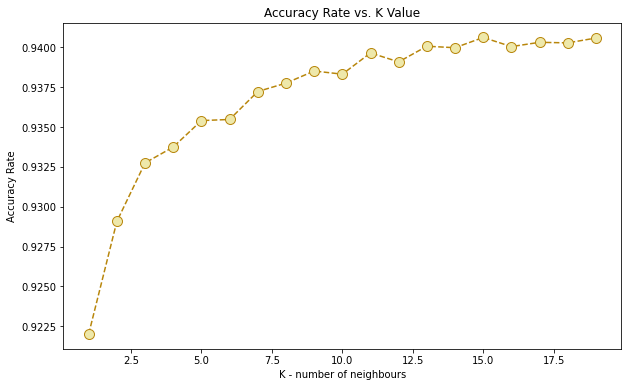

In [63]:
accuracy_rate = []
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_non_balanced_scaled_train,y_non_balanced_scaled_train)
    accuracy_rate.append(cross_val_score(model, X_non_balanced_scaled_train,y_non_balanced_scaled_train, cv=10).mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy_rate,color='darkgoldenrod', linestyle='dashed', marker='o',
         markerfacecolor='palegoldenrod', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K - number of neighbours')
plt.ylabel('Accuracy Rate');

In [38]:
%%time
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_non_balanced_scaled_train, y_non_balanced_scaled_train)

#Cross-validation
score = cross_val_score(model, X_non_balanced_scaled_train, y_non_balanced_scaled_train, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))
scores_non_balanced['Accuracy Rate']['kNN'] = score.mean()
scores_non_balanced['Standard deviation']['kNN'] = score.std()

0.939 accuracy with a standard deviation of 0.003
CPU times: user 2min 46s, sys: 1min 18s, total: 4min 4s
Wall time: 1min 44s


<br/>Our accuracy score with **k-value = 9 is 93.8% (0.003)**

#### **4.2.2. Bayesian Classifier**

From the preliminary analysis, we know that X has both categorical and numerical variables so we have to conduct **mixed naive bayes model**. <br/>

In [39]:
%%time
from mixed_naive_bayes import MixedNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Select and encode categorical features
X_non_balanced_encoded = X_non_balanced

categorical_features = [0,1,2,3,4,7,8,9,10,11,12,13,14,15]

enc = OrdinalEncoder()
enc.fit(X_non_balanced_encoded.iloc[:,categorical_features])
X_non_balanced_encoded.iloc[:, categorical_features]=enc.transform(X_non_balanced_encoded.iloc[:,categorical_features])

# Encode the target variable
y_non_balanced_encoded = y_non_balanced 
lenc=LabelEncoder()
lenc.fit(y_non_balanced_encoded)
y_non_balanced_encoded=lenc.transform(y_non_balanced_encoded)

X_non_balanced_encoded_train, X_non_balanced_encoded_test, y_non_balanced_encoded_train, y_non_balanced_encoded_test = train_test_split(X_non_balanced_encoded, y_non_balanced_encoded, train_size=0.9, 
                                  random_state=123)

model = MixedNB(categorical_features=categorical_features)
model.fit(X_non_balanced_encoded_train, y_non_balanced_encoded_train)

# evaluate the model on train and test
score = cross_val_score(model,X_non_balanced_encoded_train,y_non_balanced_encoded_train)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores_non_balanced['Accuracy Rate']['Bayesian Classifier'] = score.mean()
scores_non_balanced['Standard deviation']['Bayesian Classifier'] = score.std()

0.903 accuracy with a standard deviation of 0.003
CPU times: user 609 ms, sys: 29.1 ms, total: 638 ms
Wall time: 637 ms


Mixed Naive Bayes Classifier obtained **90.3% (0.003)** which is much higher score than in case of balanced data where the score was 80% and very fast in comparison to other models.

#### **4.2.3 Decision Trees**

In [25]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_non_balanced_train,y_non_balanced_train)
score = cross_val_score(model, X_non_balanced_train, y_non_balanced_train, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores_non_balanced['Accuracy Rate']['Decision Trees'] = score.mean()
scores_non_balanced['Standard deviation']['Decision Trees'] = score.std()

0.942 accuracy with a standard deviation of 0.002
CPU times: user 1.06 s, sys: 0 ns, total: 1.06 s
Wall time: 1.06 s


The accuracy is **94.2% (0.002) for depth = 7**

#### **4.2.4. Tree ensembles**

In [53]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, max_depth = 7)
model.fit(X_non_balanced_train,y_non_balanced_train)
score = cross_val_score(model, X_non_balanced_train, y_non_balanced_train, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores_non_balanced['Accuracy Rate']['Tree Ensembles'] = score.mean()
scores_non_balanced['Standard deviation']['Tree Ensembles'] = score.std()

0.944 accuracy with a standard deviation of 0.001
CPU times: user 13.6 s, sys: 0 ns, total: 13.6 s
Wall time: 13.6 s


The accuracy obtained for random forest model with **number of trees = 50 is equal to 93.4% (0.002)**

#### **4.2.5. Neural Networks Classifier**

In [27]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

model = MLPClassifier(random_state=1, 
                    hidden_layer_sizes=(10,10,),
                    max_iter=1000,verbose=0,tol=0.001,
                   activation='logistic').fit(X_non_balanced_train, y_non_balanced_train)

model.fit(X_non_balanced_train, y_non_balanced_train)

score=cross_val_score(model, X_non_balanced_train, y_non_balanced_train, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores_non_balanced['Accuracy Rate']['Neural Networks'] = score.mean()
scores_non_balanced['Standard deviation']['Neural Networks'] = score.std()

0.942 accuracy with a standard deviation of 0.003
CPU times: user 1min 24s, sys: 407 ms, total: 1min 24s
Wall time: 1min 19s


The accuracy obtained for neural network model with **2 hidden layers, 10 neurons each is equal to 93.8% (0.009)**. This model characterises high accuracy but is also time consuming.

### **Comparison and Evaluation**

In [54]:
scores_non_balanced

,Accuracy Rate,Standard deviation
kNN,0.938491,0.002983
Bayesian Classifier,0.903146,0.00276
Decision Trees,0.94152,0.002116
Tree Ensembles,0.944292,0.001277
Neural Networks,0.941988,0.002545


In [65]:
best_models = ['Tree Ensembles', 'Neural Networks', 'Decision Trees']
best_scores = pd.DataFrame(index = models_non_balanced, columns = ['Accuracy Rate', 'Standard deviation', 'Recall', 'Precision', 'F1'])

We can observe that all models have high accuracy above 90%. In order to find the best and the most efficient model on the whole dataset we will evaluate 3 best classifiers with accuracy above 94% using seperated test sets:
- **Tree Ensembles**

In [66]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, max_depth = 7)
model.fit(X_non_balanced_train,y_non_balanced_train)

from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(model, X_non_balanced_test, y_non_balanced_test, cv=10)
score = cross_val_score(model, X_non_balanced_test, y_non_balanced_test, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

scores_non_balanced['Accuracy Rate']['Tree Ensembles'] = score.mean()
scores_non_balanced['Standard deviation']['Tree Ensembles'] = score.std()

#Evaluation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_non_balanced_test,preds, labels = [0,1])
confm=pd.DataFrame(cm,columns=[0,1],index=[0,1])

import sklearn.metrics as mtr
print("Recall:",mtr.recall_score(y_non_balanced_test,preds,pos_label=1))
print("Precision:",mtr.precision_score(y_non_balanced_test,preds,pos_label=1))
print("F1:",mtr.f1_score(y_non_balanced_test,preds,pos_label=1))

best_scores['Accuracy Rate']['Tree Ensembles']=score.mean()
best_scores['Standard deviation']['Tree Ensembles']=score.std()
best_scores['Recall']['Tree Ensembles']=mtr.recall_score(y_non_balanced_test,preds,pos_label=1)
best_scores['Precision']['Tree Ensembles']=mtr.precision_score(y_non_balanced_test,preds,pos_label=1)
best_scores['F1']['Tree Ensembles']=mtr.f1_score(y_non_balanced_test,preds,pos_label=1)

confm


0.943 accuracy with a standard deviation of 0.007
Recall: 0.5992647058823529
Precision: 0.6926345609065155
F1: 0.6425755584756898
CPU times: user 4.5 s, sys: 0 ns, total: 4.5 s
Wall time: 4.49 s


,0,1
0,8467,217
1,327,489


- **Neural Networks**

In [71]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

model = MLPClassifier(random_state=1, 
                    hidden_layer_sizes=(10,10,),
                    max_iter=1000,verbose=0,tol=0.001,
                   activation='logistic').fit(X_non_balanced_train, y_non_balanced_train)

model.fit(X_non_balanced_train, y_non_balanced_train)

from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(model, X_non_balanced_test, y_non_balanced_test, cv=10)

score=cross_val_score(model, X_non_balanced_test, y_non_balanced_test, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

#Evaluation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_non_balanced_test,preds, labels = [0,1])
confm=pd.DataFrame(cm,columns=[0,1],index=[0,1])


import sklearn.metrics as mtr
print("Recall:",mtr.recall_score(y_non_balanced_test,preds,pos_label=1))
print("Precision:",mtr.precision_score(y_non_balanced_test,preds,pos_label=1))
print("F1:",mtr.f1_score(y_non_balanced_test,preds,pos_label=1))

best_scores['Accuracy Rate']['Neural Networks']=score.mean()
best_scores['Standard deviation']['Neural Networks']=score.std()
best_scores['Recall']['Neural Networks']=mtr.recall_score(y_non_balanced_test,preds,pos_label=1)
best_scores['Precision']['Neural Networks']=mtr.precision_score(y_non_balanced_test,preds,pos_label=1)
best_scores['F1']['Neural Networks']=mtr.f1_score(y_non_balanced_test,preds,pos_label=1)

confm

0.938 accuracy with a standard deviation of 0.009
Recall: 0.6115196078431373
Precision: 0.6497395833333334
F1: 0.6300505050505051
CPU times: user 59.4 s, sys: 5.46 s, total: 1min 4s
Wall time: 53.7 s


,0,1
0,8415,269
1,317,499


- **Decision Trees**

In [72]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_non_balanced_train,y_non_balanced_train)

from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(model, X_non_balanced_test, y_non_balanced_test, cv=10)

score = cross_val_score(model, X_non_balanced_test, y_non_balanced_test, cv=10)
print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

#Evaluation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_non_balanced_test,preds, labels = [0,1])
confm=pd.DataFrame(cm,columns=[0,1],index=[0,1])

import sklearn.metrics as mtr
print("Recall:",mtr.recall_score(y_non_balanced_test,preds,pos_label=1))
print("Precision:",mtr.precision_score(y_non_balanced_test,preds,pos_label=1))
print("F1:",mtr.f1_score(y_non_balanced_test,preds,pos_label=1))

best_scores['Accuracy Rate']['Decision Trees']=score.mean()
best_scores['Standard deviation']['Decision Trees']=score.std()
best_scores['Recall']['Decision Trees']=mtr.recall_score(y_non_balanced_test,preds,pos_label=1)
best_scores['Precision']['Decision Trees']=mtr.precision_score(y_non_balanced_test,preds,pos_label=1)
best_scores['F1']['Decision Trees']=mtr.f1_score(y_non_balanced_test,preds,pos_label=1)

confm

0.939 accuracy with a standard deviation of 0.006
Recall: 0.6188725490196079
Precision: 0.6532988357050453
F1: 0.6356198867212084
CPU times: user 377 ms, sys: 0 ns, total: 377 ms
Wall time: 372 ms


,0,1
0,8416,268
1,311,505


In [73]:
best_scores

,Accuracy Rate,Standard deviation,Recall,Precision,F1
Tree Ensembles,0.942947,0.007136,0.599265,0.692635,0.642576
Neural Networks,0.938316,0.008644,0.61152,0.64974,0.630051
Decision Trees,0.939053,0.005677,0.618873,0.653299,0.63562


The highest accuracy on test set has **Tree Ensembles with accuracy 94.3% (0.007)** model and time in between of other models. This model characterise better precision than the rest.

**Decision Tree with 93.9% (0.005)** has the fastest performance.

The last is **Neural Network with 93.8%(0.009)** accuracy but the longest time of calculations.

## **5. Main Conclusions**

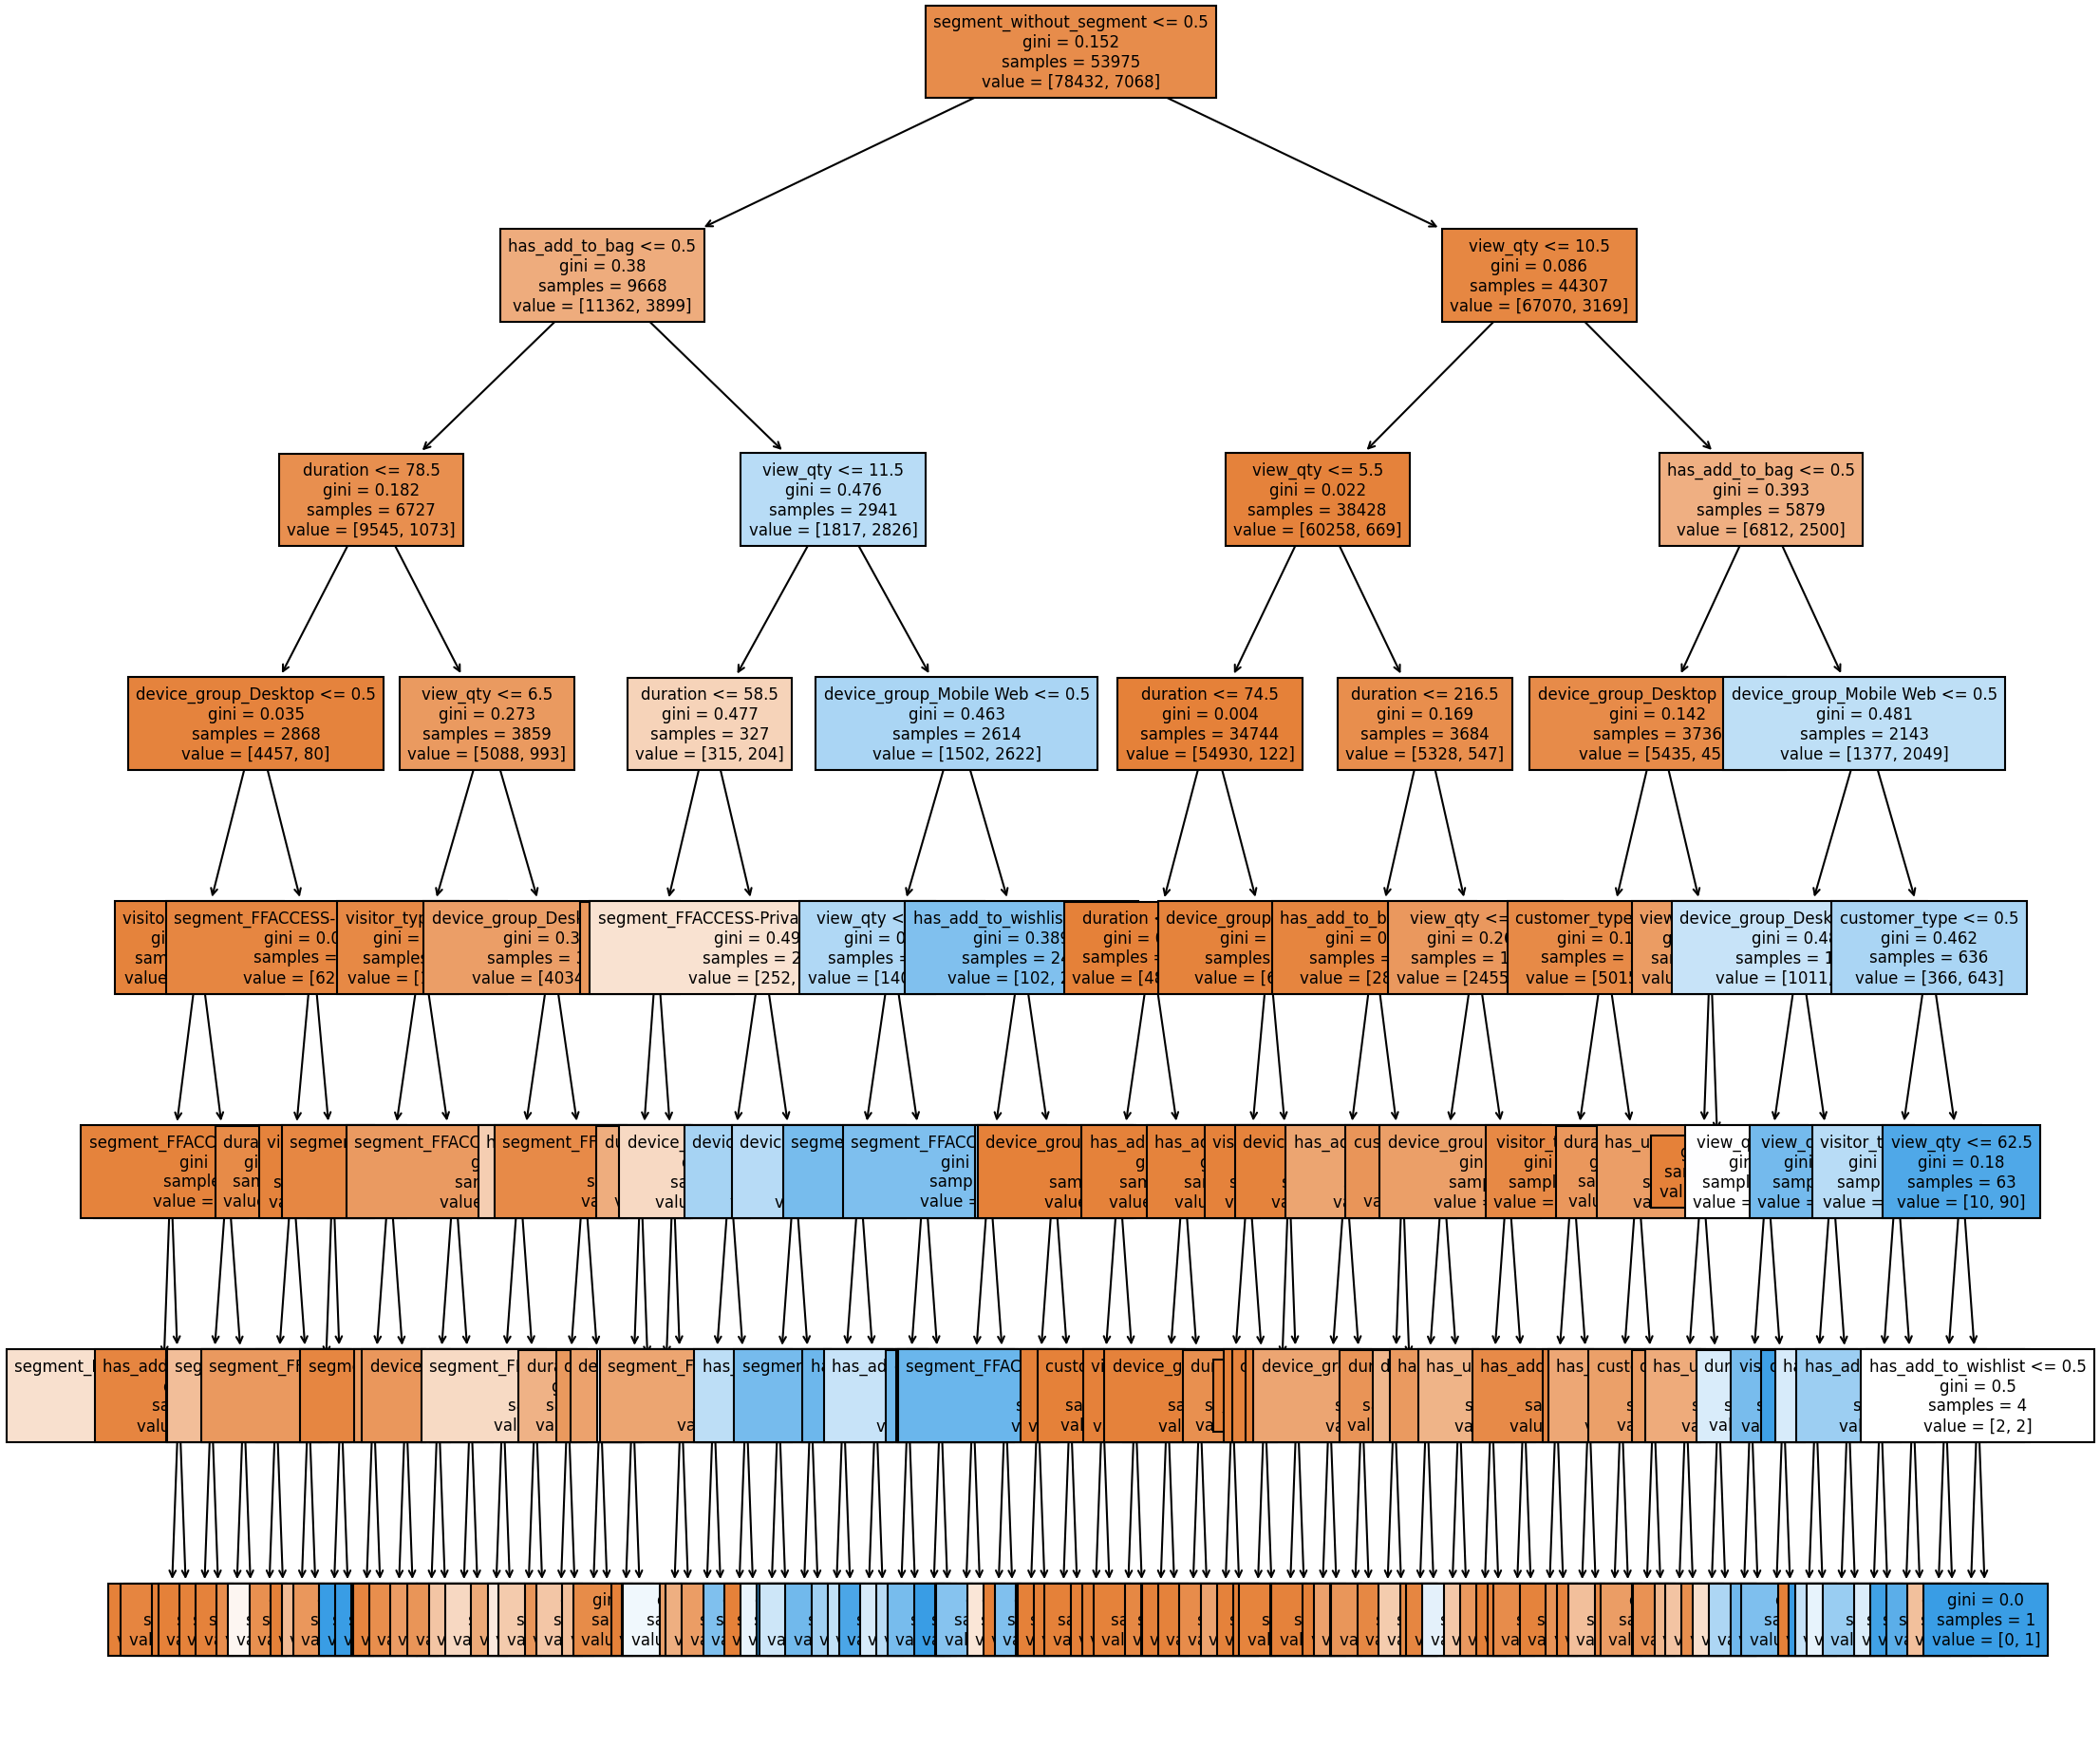

In [74]:
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

model = RandomForestClassifier(n_estimators=50, max_depth = 7)
model.fit(X_non_balanced_train,y_non_balanced_train)

def plottree(model):
    plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=150)
    tree.plot_tree(model, fontsize=8, filled=True, feature_names=X_non_balanced.columns)
    plt.show()

plottree(model.estimators_[0])

Random Forest consist of simple Decision Trees. In our example it is an ensemble of 50 estimators with max_depth = 7. Above we printed one of the trees, but presentation of the whole ensemble would not be clear. This model is relatively fast assuming the performance and obtained accuracy. We can see, that a set of simple and fast classifiers gives very good results.
The Random Forest model is finding the true values accurately, which is good in our example.

On the figure of the tree above, we can observe that the first split is made according to the most correlated feature, which is has_add_to_bag.